In [1]:
import sys
import Predictor as pr
import os
import rioxarray as rxr
from matplotlib import pyplot as plt
import numpy as np
import Predictor
from box import Box

2024-01-02 13:40:27.019968: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Segmentation Models: using `tf.keras` framework.


/panfs/ccds02/nobackup/people/almullen/.conda/envs/smallsat/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args={'image_dir': 'examples/data/images/', #directory with images to predict
      'output_dir': 'examples/data/predictions/', #directory to output predictions
      'model_file': 'res/single_class_best_model.h5', #path to model file, use single_class_slope_best_model.h5 
                                                            #if slope_model==True, otherwise use single_class_best_model.h5
      'slope_model': False, #whether or not to the model includes slope
      'slope_file': 'examples/data/slope_example.tif', #path to slope raster
      'tile_overlap': 4, #tile overlap factor for prediction
      'tile_batch': 1 #how many tiles to process per batch
     }
args=Box(args)

In [3]:
Predictor.run_prediction(args)

compiling model


2024-01-02 13:40:32.230384: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-02 13:40:32.230553: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-01-02 13:40:32.284515: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:89:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.74GiB deviceMemoryBandwidth: 836.37GiB/s
2024-01-02 13:40:32.284552: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-01-02 13:40:32.296157: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-01-02 13:40:32.296247: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

formatting input data
generating Mighty Mosaic
predicting for input data


  0%|          | 0/96 [00:00<?, ?it/s]2024-01-02 13:40:38.780899: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-01-02 13:40:38.793254: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz
2024-01-02 13:40:41.542235: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-01-02 13:40:42.639967: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
100%|██████████| 96/96 [00:08<00:00, 10.91it/s]


In [4]:
in_image_path = os.path.join(args.image_dir, [f for f in os.listdir(args.image_dir) if f.endswith('.tif')][0])
predicted_mask_path = os.path.join(args.output_dir, [f for f in os.listdir(args.output_dir) if f.endswith('.tif')][0])

In [8]:
in_image = rxr.open_rasterio(in_image_path)
predicted_mask = rxr.open_rasterio(predicted_mask_path)

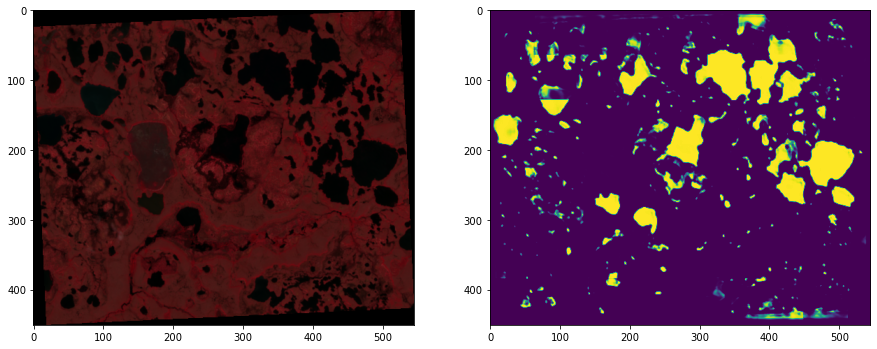

In [9]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes[0].imshow(np.moveaxis(in_image.values[1:4][::-1]/10000, 0, -1))
axes[1].imshow(predicted_mask[0])

In [10]:
#threshold prediction so open water is anything greater than 0.5
predicted_mask.values[predicted_mask.values>=0.5]=1
predicted_mask.values[predicted_mask.values<0.5]=0

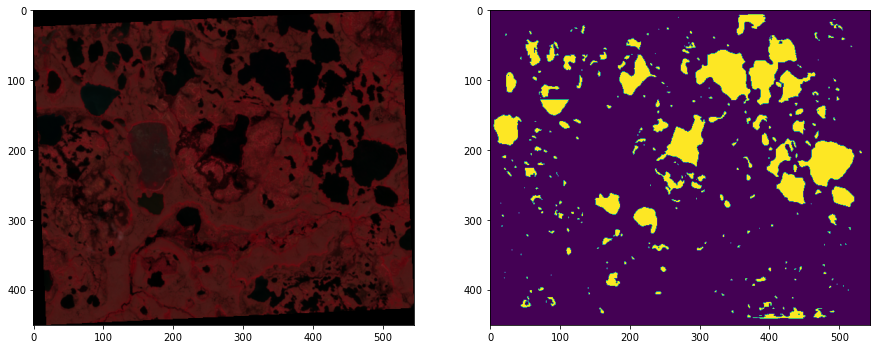

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes[0].imshow(np.moveaxis(in_image.values[1:4][::-1]/10000, 0, -1))
axes[1].imshow(predicted_mask[0])